# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [28]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter
data = pd.read_csv('preprocessed_data.csv',nrows=50000)
data.shape
data.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [29]:
y = data['project_is_approved']
X = data.drop(['project_is_approved'], axis = 1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [4]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



In [30]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.33, stratify = y_train)

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [31]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
vecorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vecorizer.fit(X_train['essay'].values)
X_train_essay_bow = vecorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vecorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vecorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


In [32]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
vecorizer_essay_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vecorizer_essay_tfidf.fit(X_train['essay'].values)
X_train_essay_tfidf = vecorizer_essay_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = vecorizer_essay_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vecorizer_essay_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)

After vectorizations
(22445, 5000) (22445,)
(11055, 5000) (11055,)
(16500, 5000) (16500,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [8]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
#Categorical features => 
#- teacher_prefix
#- project_grade_category
#- school_state
#- clean_categories
#- clean_subcategories

In [33]:
#teacher_prefix
vectorizer_prefix = CountVectorizer()
vectorizer_prefix.fit(X_train['teacher_prefix'].values)
X_train_teacher_prefix_ohe = vectorizer_prefix.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer_prefix.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer_prefix.transform(X_test['teacher_prefix'].values)

#project_grade_category
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values)
X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_grade.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values)

#school_state
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values)
X_train_school_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer_state.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer_state.transform(X_test['school_state'].values)

#clean_categories
vectorizer_cat = CountVectorizer()
vectorizer_cat.fit(X_train['clean_categories'].values)
X_train_clean_categories_ohe = vectorizer_cat.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer_cat.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer_cat.transform(X_test['clean_categories'].values)

#clean_subcategories
vectorizer_sub_cat = CountVectorizer()
vectorizer_sub_cat.fit(X_train['clean_subcategories'].values)
X_train_clean_subcategories_ohe = vectorizer_sub_cat.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer_sub_cat.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_sub_cat.transform(X_test['clean_subcategories'].values)

In [10]:
# Apply Normalization on the numerical features using Normalizer().
# numerical features
#- price
#- teacher_number_of_previously_posted_projects

In [34]:
#price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_price_norm = normalizer.fit_transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.fit_transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.fit_transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)

#teacher_number_of_previously_posted_projects
normalizer = Normalizer()
X_train_prev_posted_proj_norm = normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_prev_posted_proj_norm = normalizer.fit_transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_prev_posted_proj_norm = normalizer.fit_transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_prev_posted_proj_norm = X_train_prev_posted_proj_norm.reshape(-1,1)
X_cv_prev_posted_proj_norm = X_cv_prev_posted_proj_norm.reshape(-1,1)
X_test_prev_posted_proj_norm = X_test_prev_posted_proj_norm.reshape(-1,1)

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [12]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
#Concatenating all features
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((X_train_essay_bow, X_train_teacher_prefix_ohe, X_train_grade_ohe, X_train_school_state_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_price_norm,X_train_prev_posted_proj_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_teacher_prefix_ohe, X_cv_grade_ohe, X_cv_school_state_ohe, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_price_norm,X_cv_prev_posted_proj_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_teacher_prefix_ohe, X_test_grade_ohe, X_test_school_state_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_price_norm,X_test_prev_posted_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)


Final Data matrix
(22445, 5097) (22445,)
(11055, 5097) (11055,)
(16500, 5097) (16500,)


In [13]:
def batchPredict(clf,data):
    y_data_predict = []
    datapoints_in_mulptiple_of_1000 = data.shape[0] - data.shape[0]%1000

    for i in range(0,datapoints_in_mulptiple_of_1000,1000):
        y_data_predict.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 != 0:
        y_data_predict.extend(clf.predict_proba(data[datapoints_in_mulptiple_of_1000:])[:,1])
    
    return y_data_predict

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.89it/s]


(22445, 5097) (22445,)
(11055, 5097) (11055,)
(16500, 5097) (16500,)


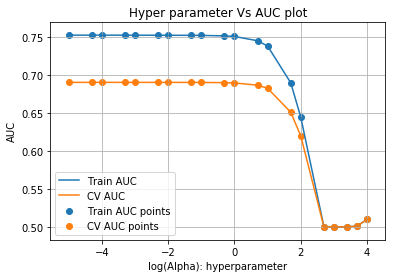

In [14]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
train_auc = []
cv_auc = []
alpha = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alpha = []

for i in tqdm(alpha):
    nb = MultinomialNB(alpha = i)
    nb.fit(X_tr,y_train)
    y_train_pred = batchPredict(nb,X_tr)
    y_cv_pred = batchPredict(nb,X_cr)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
for j in alpha:
    log_alpha.append(np.log10(j))
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()


In [15]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.

#from above graph we can see that best AUC for CV is 0.68 and for log(0) distance between train and test AUC is less. Hence best
#alpha will be 1
best_alpha_bow = 1

In [19]:
from sklearn.metrics import roc_curve, auc
from scipy.sparse import vstack
#combine X_tr and X_cr 
print(X_tr.shape)
print(X_cr.shape)
print(y_train.shape)
print(y_test.shape)
X_tr = vstack((X_tr, X_cr)).tocsr()
#print(X_tr.shape)
#combine y_train and y_test 
y_train = pd.concat([y_train, y_cv], axis = 0)
#print(y_train.shape)
#Fit model with best alpha
nb = MultinomialNB(alpha = best_alpha_bow)
nb.fit(X_tr,y_train)
y_train_pred = batchPredict(nb,X_tr)
y_test_pred = batchPredict(nb,X_te)

(22445, 5097)
(11055, 5097)
(22445,)
(16500,)


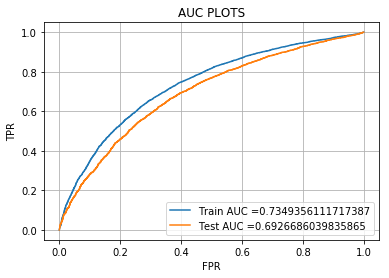

In [20]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_set1_train = auc(train_fpr, train_tpr)
auc_set1_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc_set1_train))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc_set1_test))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS")
plt.grid()
plt.show()

In [23]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_prob(proba, threshold):
    predictions = []
    
    for i in proba:
        if i >= threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [25]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_prob(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_prob(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.46104817158517597 for threshold 0.868
Train confusion matrix
[[ 3782  1583]
 [ 9734 18401]]
Test confusion matrix
[[1727  915]
 [4977 8881]]


#### Set 2

In [35]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from scipy.sparse import hstack

X_tr = hstack((X_train_essay_tfidf, X_train_teacher_prefix_ohe, X_train_grade_ohe, X_train_school_state_ohe, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_price_norm,X_train_prev_posted_proj_norm)).tocsr()
X_cr = hstack((X_cv_essay_tfidf, X_cv_teacher_prefix_ohe, X_cv_grade_ohe, X_cv_school_state_ohe, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_price_norm,X_cv_prev_posted_proj_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_teacher_prefix_ohe, X_test_grade_ohe, X_test_school_state_ohe, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_price_norm,X_test_prev_posted_proj_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)


Final Data matrix
(22445, 5101) (22445,)
(11055, 5101) (11055,)
(16500, 5101) (16500,)


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.88it/s]


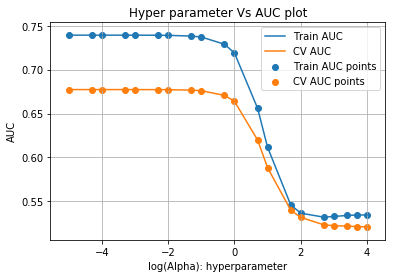

In [37]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
train_auc = []
cv_auc = []
alpha = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
log_alpha = []

for i in tqdm(alpha):
    nb = MultinomialNB(alpha = i)
    nb.fit(X_tr,y_train)
    y_train_pred = batchPredict(nb,X_tr)
    y_cv_pred = batchPredict(nb,X_cr)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv,y_cv_pred))
    
for j in alpha:
    log_alpha.append(np.log10(j))
    
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [38]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.

#from above graph we can see that best AUC for CV is 0.67 and for log(-1.2) distance between train and test AUC is less. Hence best
#alpha will be 0.063
best_alpha_tfidf = 0.063

In [39]:
from sklearn.metrics import roc_curve, auc
from scipy.sparse import vstack
#combine X_tr and X_cr 
X_tr = vstack((X_tr, X_cr)).tocsr()

#combine y_train and y_test 
y_train = pd.concat([y_train, y_cv], axis = 0)

#Fit model with best alpha
nb = MultinomialNB(alpha = best_alpha_tfidf)
nb.fit(X_tr,y_train)
y_train_pred = batchPredict(nb,X_tr)
y_test_pred = batchPredict(nb,X_te)

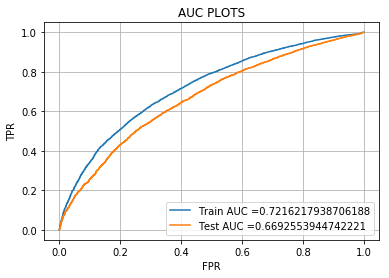

In [40]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_set2_train = auc(train_fpr, train_tpr)
auc_set2_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc_set2_train))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc_set2_test))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC PLOTS")
plt.grid()
plt.show()

In [43]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_prob(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_prob(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.44086304035048696 for threshold 0.848
Train confusion matrix
[[ 3679  1686]
 [10047 18088]]
Test confusion matrix
[[1625 1017]
 [5156 8702]]


In [44]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
#Top 20 features from set 2

###############################################################################
#Refered https://www.kaggle.com/nikhilparmar9/naive-bayes-donorschoose-dataset
###############################################################################
all_feature_names_tfidf = []
for i in vecorizer_essay_tfidf.get_feature_names():
    all_feature_names_tfidf.append(i)

for i in vectorizer_prefix.get_feature_names():
    all_feature_names_tfidf.append(i)

for i in vectorizer_grade.get_feature_names():
    all_feature_names_tfidf.append(i)

for i in vectorizer_state.get_feature_names():
    all_feature_names_tfidf.append(i)

for i in vectorizer_cat.get_feature_names():
    all_feature_names_tfidf.append(i)

for i in vectorizer_sub_cat.get_feature_names():
    all_feature_names_tfidf.append(i)

all_feature_names_tfidf.append("price")
all_feature_names_tfidf.append("prev_proj")


In [45]:
print(len(all_feature_names_tfidf))
totalFeatureNamesTfidf=len(all_feature_names_tfidf)
print(X_tr.shape)
print(totalFeatureNamesTfidf)

5101
(33500, 5101)
5101


In [46]:
nb_tfidf=MultinomialNB(alpha=0.5,class_prior=[0.5,0.5])
nb_tfidf.fit(X_tr,y_train)


MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5])

In [47]:
#Negative features
tfidf_features_probs_neg = {}
for a in range(totalFeatureNamesTfidf) :
    tfidf_features_probs_neg[a] = nb_tfidf.feature_log_prob_[0,a]
    
final_tfidf_features_neg = pd.DataFrame({'feature_prob_estimates' : list(tfidf_features_probs_neg.values()),
'feature_names' : list(all_feature_names_tfidf)})

a = final_tfidf_features_neg.sort_values(by = ['feature_prob_estimates'], ascending = False)
print("TOP 10 Negative features - TFIDF")
a.head(10)

TOP 10 Negative features - TFIDF


,feature_prob_estimates,feature_names
5002,-3.481420,mrs
5064,-3.648641,literacy_language
5008,-3.695666,grades_prek_2
5065,-3.768674,math_science
5003,-3.807534,ms
5005,-3.916938,grades_3_5
5086,-4.120510,literacy
5088,-4.186554,mathematics
5087,-4.436492,literature_writing
5062,-4.563308,health_sports


In [48]:
#Positive features
tfidf_features_probs_pos = {}
for a in range(totalFeatureNamesTfidf) :
    tfidf_features_probs_pos[a] = nb_tfidf.feature_log_prob_[1,a]

final_tfidf_features_pos = pd.DataFrame({'feature_prob_estimates' : list(tfidf_features_probs_pos.values()),
'feature_names' : list(all_feature_names_tfidf)})

b = final_tfidf_features_pos.sort_values(by = ['feature_prob_estimates'], ascending = False)

print("TOP 10 Positive features - TFIDF")
b.head(10)

TOP 10 Positive features - TFIDF


,feature_prob_estimates,feature_names
5002,-3.408348,mrs
5064,-3.522230,literacy_language
5008,-3.681484,grades_prek_2
5065,-3.825071,math_science
5003,-3.838324,ms
5005,-3.855554,grades_3_5
5086,-3.965673,literacy
5088,-4.197305,mathematics
5087,-4.356522,literature_writing
5062,-4.483758,health_sports


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [53]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyperparameter: Alpha", "Train AUC", "Test AUC"]

x.add_row(["BOW", "Multinomial Naive Bayes", best_alpha_bow, round(auc_set1_train,2),round(auc_set1_test,2)])
x.add_row(["TF-IDF", "Multinomial Naive Bayes", best_alpha_tfidf, round(auc_set2_train,2),round(auc_set2_test,2)])

print(x)

+------------+-------------------------+-----------------------+-----------+----------+
| Vectorizer |          Model          | Hyperparameter: Alpha | Train AUC | Test AUC |
+------------+-------------------------+-----------------------+-----------+----------+
|    BOW     | Multinomial Naive Bayes |           1           |    0.73   |   0.69   |
|   TF-IDF   | Multinomial Naive Bayes |         0.063         |    0.72   |   0.67   |
+------------+-------------------------+-----------------------+-----------+----------+


In [51]:
!pip install prettytable